In [2]:
# Get all the runs for a particular project:

import matplotlib.pyplot as plt
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("nightdude/EXP1 - Within-Subject Transfer")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [4]:
df = []
for run in runs:
    _df = run.history()[['eval_acc', 'ep', 'train_acc', 'feat_loss', 'class_loss']]
    _df['name'] = run.name
    _df['name'] = run.group
    df += _df.to_dict(orient='records')
df = pd.DataFrame(df)

In [5]:
df['trained'] = df.name.apply(lambda x: x.split('_')[0])
df['frozen'] = df.name.apply(lambda x: x.split('_')[1])
df['ds'] = df.name.apply(lambda x: x.split('_')[3])
df['subj'] = df.name.apply(lambda x: x.split('_')[4])
df.drop(columns='name', inplace=True)

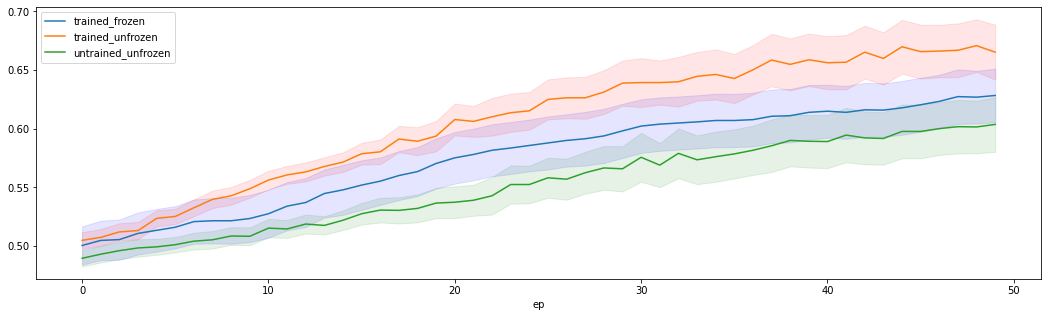

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
__df = df[(df.trained == 'trained') & (df.frozen == 'frozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'trained'].groupby('ep').std().eval_acc / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_frozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='blue', alpha=0.1)

__df = df[(df.trained == 'trained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='red', alpha=0.1)

__df = df[(df.trained == 'untrained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'untrained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='green', alpha=0.1)

# 🔥Experiment 1. Within-subject transfer
## Finetune on 1 subject's <a style="color:red">day 1</a>, test on <a style="color:red">day 2</a>

## Highlights

- `targetDsName = 'BNCI001-2014.pt'`
- `pretrain_dataset`: all datasets but the `targetDsName`
- `finetune_dataset`: ONE subject's session A from the `targetDsName`
- `test_dataset`:     that subject's session B from the `targetDsName`


### plot the mean and std for eval losses of the 3 scenarios:

- train the classifier attached to a **pre-trained but frozen** feature detector
- co-train the classifier attached to a **pre-trained but not frozen** feature detector
- train the classifier and feature detector **from scratch** (i.e. same as training EEGNet from scratch)

- all the 3 scenarios are run in `EEGNet Contrastive Pretraining.ipynb`

- the curves below show the mean (over the subjects, and runs, 3 for each subject) test accuracy in the 3 scenarios


In [3]:
# Get all the runs for a particular project:

import matplotlib.pyplot as plt
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("nightdude/EEGNet_7ch_BIGGER_finetune_on_temp_augs")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [ ]:
df = []
for run in runs:
    _df = run.history()[['eval_acc', 'ep', 'train_acc', 'feat_loss', 'class_loss']]
    _df['name'] = run.name
    _df['name'] = run.group
    df += _df.to_dict(orient='records')
df = pd.DataFrame(df)

In [36]:
df['trained'] = df.name.apply(lambda x: x.split('_')[0])
df['frozen'] = df.name.apply(lambda x: x.split('_')[1])
df['ds'] = df.name.apply(lambda x: x.split('_')[3])
df['subj'] = df.name.apply(lambda x: x.split('_')[4])
df.drop(columns='name', inplace=True)

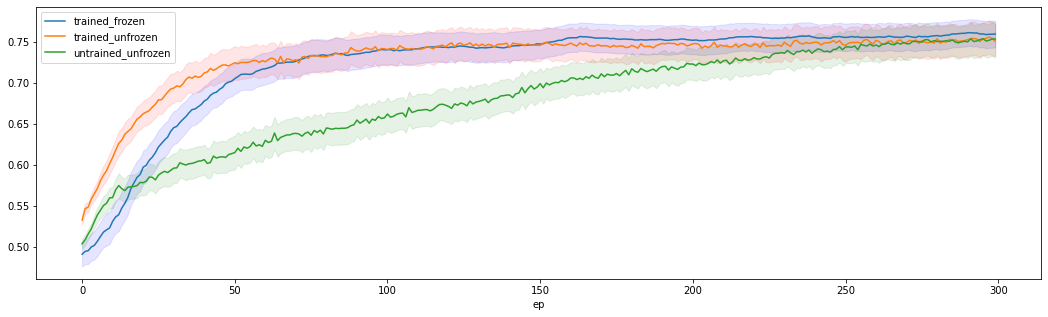

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
__df = df[(df.trained == 'trained') & (df.frozen == 'frozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'trained'].groupby('ep').std().eval_acc / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_frozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='blue', alpha=0.1)

__df = df[(df.trained == 'trained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='red', alpha=0.1)

__df = df[(df.trained == 'untrained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'untrained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='green', alpha=0.1)

# 🔥Experiment 2: Cross-subject transfer
## finetune on all subjects but the test, test on the test one

## Highlights|

- `targetDsName = 'BNCI001-2014.pt'`
- `pretrain_dataset`: all datasets but the `targetDsName`
- `finetune_dataset`: all except one held-out subject from the `target_dataset`
- `test_dataset`: the held-out subject


### plot the mean and std for eval losses of the 3 scenarios:

- train the classifier attached to a **pre-trained but frozen** feature detector
- co-train the classifier attached to a **pre-trained but not frozen** feature detector
- train the classifier and feature detector **from scratch** (i.e. same as training EEGNet from scratch)

- all the 3 scenarios are run in `EEGNet Contrastive Pretraining.ipynb`
- the curves below show the mean (over the subjects, and runs, 3 for each subject) test accuracy in the 3 scenarios

In [1]:
# Get all the runs for a particular project:

import matplotlib.pyplot as plt
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("nightdude/EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftmany_tst1")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "name": name_list
    })

In [2]:
df = []
for run in runs:
    _df = run.history()[['eval_acc', 'ep', 'train_acc', 'feat_loss', 'class_loss']]
    _df['name'] = run.name
    _df['name'] = run.group
    df += _df.to_dict(orient='records')
df = pd.DataFrame(df)

In [3]:
df['trained'] = df.name.apply(lambda x: x.split('_')[0])
df['frozen'] = df.name.apply(lambda x: x.split('_')[1])
df['ds'] = df.name.apply(lambda x: x.split('_')[3])
df['subj'] = df.name.apply(lambda x: x.split('_')[4])
df.drop(columns='name', inplace=True)

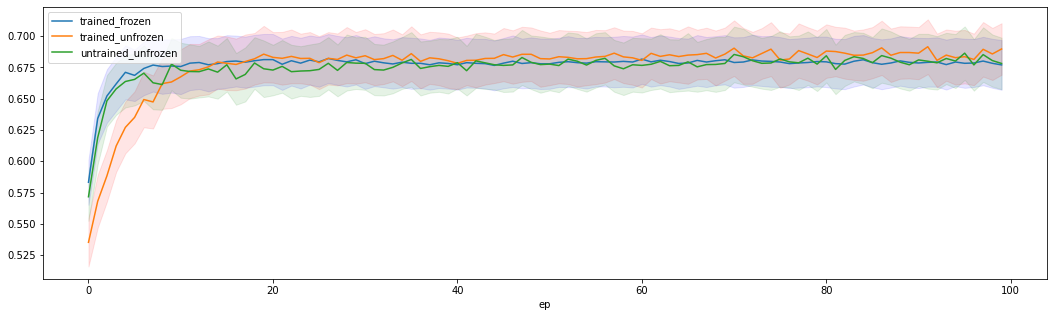

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
__df = df[(df.trained == 'trained') & (df.frozen == 'frozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'trained'].groupby('ep').std().eval_acc / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_frozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='blue', alpha=0.1)

__df = df[(df.trained == 'trained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='red', alpha=0.1)

__df = df[(df.trained == 'untrained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'untrained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='green', alpha=0.1)

# 🔥Experiment 3: Cross-subject transfer
## Pre-train on other datasets, finetune on 1 subject in the target ds, test on the rest in the target ds

## Highlights

- `targetDsName = 'BNCI001-2014.pt'`
- `pretrain_dataset`: all datasets but the `targetDsName`
- `test_dataset`: all except one held-out subject from the `target_dataset`
- `finetune_dataset`: the held-out subject


### plot the mean and std for eval losses of the 3 scenarios:

- train the classifier attached to a **pre-trained but frozen** feature detector
- co-train the classifier attached to a **pre-trained but not frozen** feature detector
- train the classifier and feature detector **from scratch** (i.e. same as training EEGNet from scratch)

- all the 3 scenarios are run in `EEGNet Contrastive Pretraining.ipynb`
- the curves below show the mean (over the subjects, and runs, 3 for each subject) test accuracy in the 3 scenarios

In [5]:
# Get all the runs for a particular project:

import matplotlib.pyplot as plt
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("nightdude/EEGNet_7ch_BIGGER_finetune_on_temp_augs_hard")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "name": name_list
    })

In [6]:
df = []
for run in runs:
    _df = run.history()[['eval_acc', 'ep', 'train_acc', 'feat_loss', 'class_loss']]
    _df['name'] = run.name
    _df['name'] = run.group
    df += _df.to_dict(orient='records')
df = pd.DataFrame(df)

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.
wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


In [7]:
df['trained'] = df.name.apply(lambda x: x.split('_')[0])
df['frozen'] = df.name.apply(lambda x: x.split('_')[1])
df['ds'] = df.name.apply(lambda x: x.split('_')[3])
df['subj'] = df.name.apply(lambda x: x.split('_')[4])
df.drop(columns='name', inplace=True)

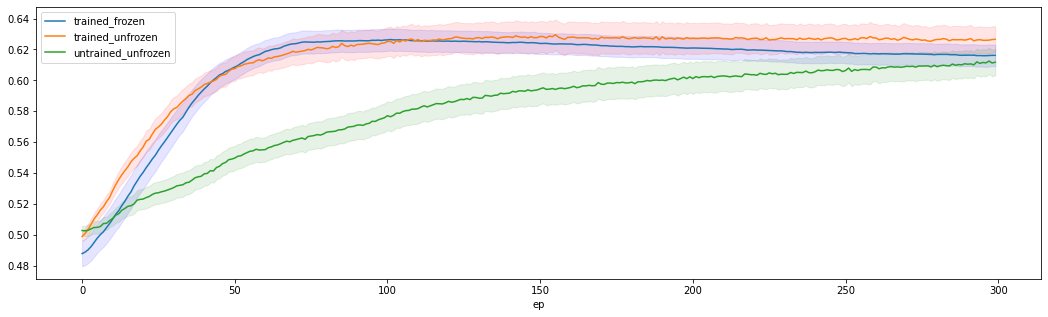

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
__df = df[(df.trained == 'trained') & (df.frozen == 'frozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'trained'].groupby('ep').std().eval_acc / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_frozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='blue', alpha=0.1)

__df = df[(df.trained == 'trained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='red', alpha=0.1)

__df = df[(df.trained == 'untrained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'untrained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='green', alpha=0.1)

# 🔥Experiment 4. Within-subject transfer
## same as in Experiment 1 but finetune on 1/5 of Session A data, test on Sess B

## Highlights

- `targetDsName = 'BNCI001-2014.pt'`
- `pretrain_dataset`: all datasets but the `targetDsName`
- `test_dataset`: all the trials in Sesson B (Day 2) of the held-out subject from the `target_dataset`
- `finetune_dataset`: 1/5 of Session A (day 1) trials (28 trials) of the held-out subject


### plot the mean and std for eval losses of the 3 scenarios:

- train the classifier attached to a **pre-trained but frozen** feature detector
- co-train the classifier attached to a **pre-trained but not frozen** feature detector
- train the classifier and feature detector **from scratch** (i.e. same as training EEGNet from scratch)

- all the 3 scenarios are run in `EEGNet Contrastive Pretraining.ipynb`
- the curves below show the mean (over the subjects, and runs, 3 for each subject) test accuracy in the 3 scenarios

In [13]:
# Get all the runs for a particular project:

import matplotlib.pyplot as plt
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("nightdude/EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA")


df = []
for run in runs:
    _df = run.history()[['eval_acc', 'ep', 'train_acc', 'feat_loss', 'class_loss']]
    _df['name'] = run.name
    _df['name'] = run.group
    df += _df.to_dict(orient='records')
df = pd.DataFrame(df)

df['trained'] = df.name.apply(lambda x: x.split('_')[0])
df['frozen'] = df.name.apply(lambda x: x.split('_')[1])
df['ds'] = df.name.apply(lambda x: x.split('_')[3])
df['subj'] = df.name.apply(lambda x: x.split('_')[4])
df.drop(columns='name', inplace=True)

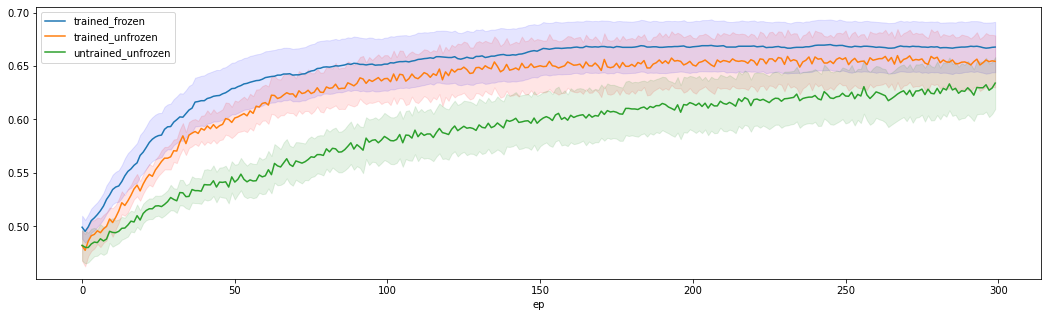

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
__df = df[(df.trained == 'trained') & (df.frozen == 'frozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'trained'].groupby('ep').std().eval_acc / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_frozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='blue', alpha=0.1)

__df = df[(df.trained == 'trained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'trained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='red', alpha=0.1)

__df = df[(df.trained == 'untrained') & (df.frozen == 'unfrozen')]
tmp = __df.groupby('ep').mean()
tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
tmp['std_'] = tmp.eval_acc + tmp['std']
tmp['_std'] = tmp.eval_acc - tmp['std']
tmp.plot(y='eval_acc', ax=ax, label = 'untrained_unfrozen')
ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='green', alpha=0.1)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd 
import wandb
api = wandb.Api(timeout=19)

In [9]:
def get_runs_and_process(entity=None, project=None):
    runs = api.runs(f'{entity}/{project}')

    df = []
    for run in runs:
        _df = run.history()[['eval_acc', 'ep', 'train_acc', 'feat_loss', 'class_loss']]
        _df['name'] = run.name
        _df['name'] = run.group
        df += _df.to_dict(orient='records')
    df = pd.DataFrame(df)

    df['trained'] = df.name.apply(lambda x: x.split('_')[0])
    df['frozen'] = df.name.apply(lambda x: x.split('_')[1])
    df['ds'] = df.name.apply(lambda x: x.split('_')[3])
    df['subj'] = df.name.apply(lambda x: x.split('_')[4])
    df.drop(columns='name', inplace=True)
    df.to_csv(f'{project}.csv')
    

def plot_run_df(project=None, lw=1, mark=None, ax=None):
    df = pd.read_csv(f'{project}.csv')
    __df = df[(df.trained == 'trained') & (df.frozen == 'frozen')]
    tmp = __df.groupby('ep').mean()
    tmp['std'] = df[df.trained == 'trained'].groupby('ep').std().eval_acc / 5
    tmp['std_'] = tmp.eval_acc + tmp['std']
    tmp['_std'] = tmp.eval_acc - tmp['std']
    tmp.plot(y='eval_acc', ax=ax, label = f'trained_frozen-{mark}', lw=lw, color='blue')
    ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='blue', alpha=0.1)

    __df = df[(df.trained == 'trained') & (df.frozen == 'unfrozen')]
    tmp = __df.groupby('ep').mean()
    tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
    tmp['std_'] = tmp.eval_acc + tmp['std']
    tmp['_std'] = tmp.eval_acc - tmp['std']
    tmp.plot(y='eval_acc', ax=ax, label = f'trained_unfrozen-{mark}', lw=lw, color='red')
    ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='red', alpha=0.1)

    __df = df[(df.trained == 'untrained') & (df.frozen == 'unfrozen')]
    tmp = __df.groupby('ep').mean()
    tmp['std'] = df[df.trained == 'untrained'].groupby('ep').std().eval_acc  / 5
    tmp['std_'] = tmp.eval_acc + tmp['std']
    tmp['_std'] = tmp.eval_acc - tmp['std']
    tmp.plot(y='eval_acc', ax=ax, label = f'untrained_unfrozen-{mark}', lw=lw, color='green')
    ax.fill_between(tmp.index.tolist(), tmp.std_.tolist(), tmp._std.tolist(), color='green', alpha=0.1)
    
    

In [54]:


project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA'
get_runs_and_process(entity=entity, project=project, ax=ax)

project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA_AUG_1'
get_runs_and_process(entity=entity, project=project, ax=ax)

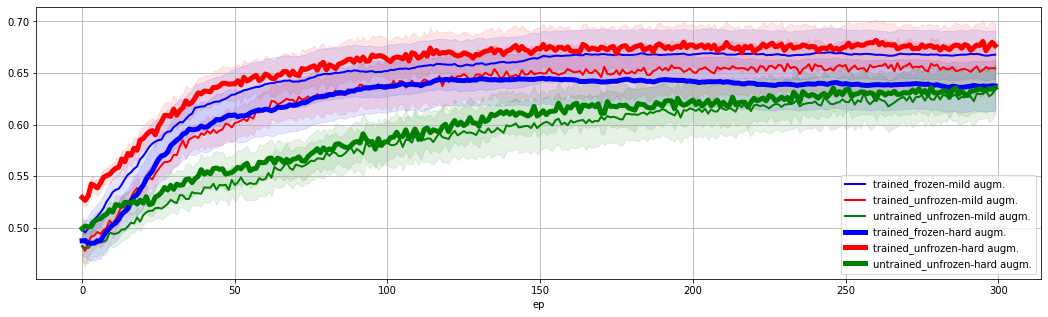

In [10]:
entity = 'nightdude'
    
    
    
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA'
plot_run_df(project=project, lw=2, mark='mild augm.', ax=ax)


project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA_AUG_1'
plot_run_df(project=project, lw=5, mark='hard augm.', ax=ax)


ax.grid()

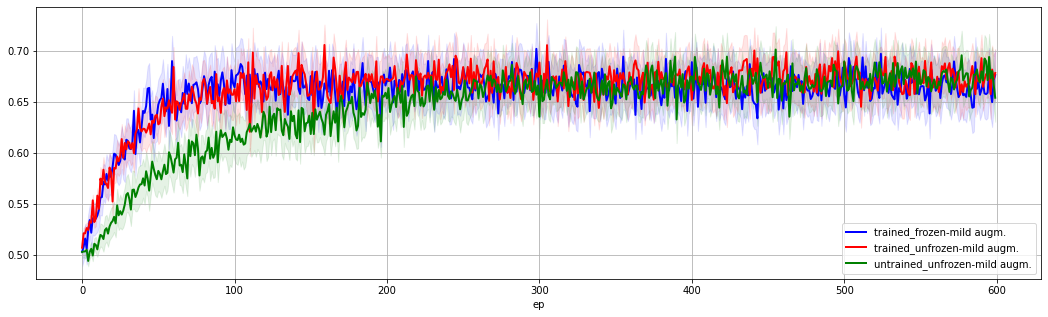

In [46]:
entity = 'nightdude'

fig, ax = plt.subplots(1, 1, figsize=(18, 5))

# project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA_600' # same by 600 epochs
# get_runs_and_process(entity=entity, project=project)
# plot_run_df(project=project, lw=2, mark='mild augm.', ax=ax)

project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA_600_a' # same by 600 epochs
get_runs_and_process(entity=entity, project=project)
plot_run_df(project=project, lw=2, mark='mild augm.', ax=ax)

# project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA_AUG_1_600' # same by 600 epochs
# get_runs_and_process(entity=entity, project=project)
# plot_run_df(project=project, lw=5, mark='hard augm.', ax=ax)


ax.grid()

In [51]:
project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA_600_a' # same by 600 epochs
df = pd.read_csv(f'{project}.csv')

<AxesSubplot:xlabel='ep'>

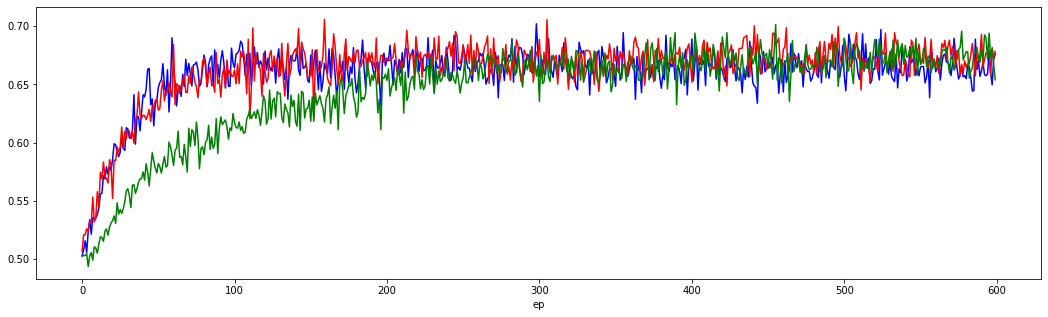

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

df[(df.trained == 'trained') & (df.frozen == 'frozen')].groupby('ep').mean().eval_acc.plot(ax=ax, color='blue')
df[(df.trained == 'trained') & (df.frozen == 'unfrozen')].groupby('ep').mean().eval_acc.plot(ax=ax, color='red')
df[df.trained == 'untrained'].groupby('ep').mean().eval_acc.plot(ax=ax, color='green')

<AxesSubplot:xlabel='ep'>

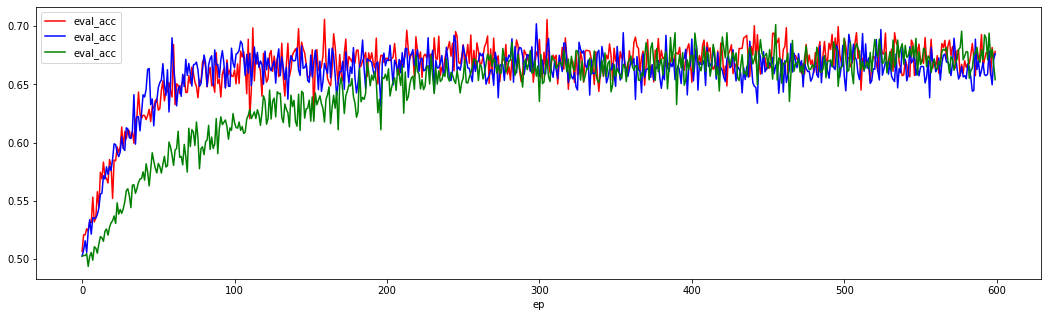

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA_600_a' # same by 600 epochs
# project = 'EEGNet_7ch_BIGGER_finetune_on_temp_augs_ftOn1fifthOfSessA_AUG_1_600' # same by 600 epochs
df = pd.read_csv(f'{project}.csv')

df[(df.trained=='trained') & (df.frozen=='unfrozen')].groupby('ep').mean().plot(y='eval_acc', color='red', ax=ax)
df[(df.trained=='trained') & (df.frozen=='frozen')].groupby('ep').mean().plot(y='eval_acc', color='blue', ax=ax)
df[(df.trained=='untrained') & (df.frozen=='unfrozen')].groupby('ep').mean().plot(y='eval_acc', color='green', ax=ax)